<a href="https://colab.research.google.com/github/gabrie1-s/WQA_Regression_HW2/blob/main/HMW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
import scipy as scipy
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
import math
from scipy import stats
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
drive.mount('/content/drive')

w_wine = pd.read_csv('drive/My Drive/ICA/winequality-white.csv', sep = ';')
r_wine = pd.read_csv('drive/My Drive/ICA/winequality-red.csv', sep = ';')

Mounted at /content/drive


In [ ]:
w_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
r_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#1. Vinho Branco

##1.1 Preprocessamento

### 1.1.1 Remoção dos outliers

In [ ]:
def plot_boxplot(df, ft):
  df.boxplot(column = [ft])
  plt.grid(False)
  plt.show()

def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  I = Q3 - Q1
  LwLimit = Q1 - 1.5*I
  UpLimit = Q3 + 1.5*I
  ls = df.index[(df[ft] < LwLimit) | (df[ft] > UpLimit)]
  return ls

def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

def apply_remotion(dataset):
  remover = []
  for i in dataset:
      if(i!='quality'):
          remover.extend(outliers(dataset, i))
  dataset_cleaned = remove(dataset, remover)
  return dataset_cleaned  

In [ ]:
w_wine_cleaned = apply_remotion(w_wine)
# w_wine_cleaned = w_wine.copy()

### 1.1.2 Tratamento de Multicolinearidade com ajuda do PCA

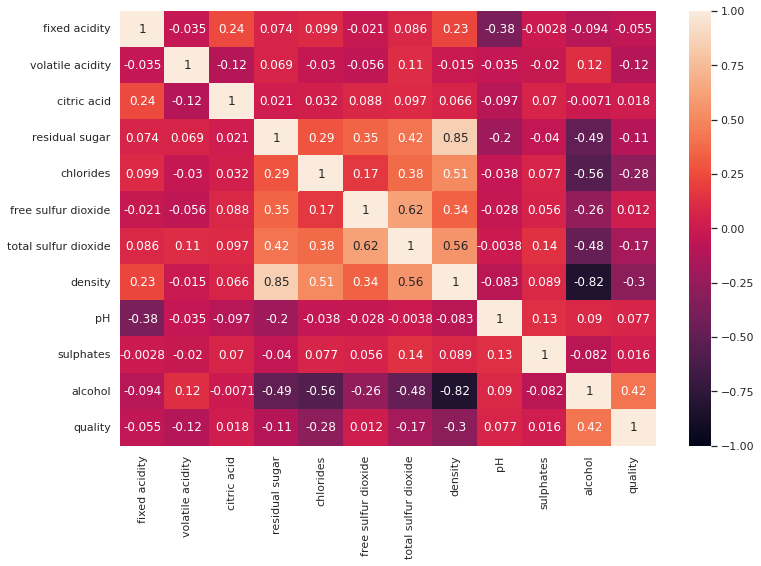

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(w_wine_cleaned.corr(), annot=True, vmin=-1, vmax=1)
plt.savefig('w_wine_heatmap.png')

In [ ]:
X = w_wine_cleaned.iloc[:, 0:11]
y = w_wine_cleaned.iloc[:, -1]
column_name = w_wine_cleaned.drop(columns=['quality']).columns

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(pcs,loadings, target, column_name, labels=None):
    xs = pcs[:,0]
    ys = pcs[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    pc1 = xs*scalex
    pc2 = ys*scaley

    df = {'pc1': pc1, 'pc2': pc2, 'quality': target}
    df = pd.DataFrame(data=df)

    fig = px.scatter(df, x='pc1', y='pc2', color='quality', color_continuous_scale = "rainbow")

    for i, feature in enumerate(column_name):
        fig.add_shape(type='line',
                      x0=0,
                      y0=0,
                      x1=loadings[i,0],
                      y1=loadings[i,1]
                    )
        fig.add_annotation(x=loadings[i,0],
                           y=loadings[i,1],
                           ax=0,
                           ay=0,
                           xanchor="center",
                           yanchor="bottom",
                           text = feature,
                           font=dict(size=18,
                                     color="crimson"
                                    )
                          )
    fig.show()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), y, column_name)

In [ ]:
w_wine_dropped = w_wine_cleaned.drop(columns=["free sulfur dioxide", "density"])

##1.2 Regressao Linear

**Importando bibliotecas**

In [ ]:
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn as sk

**Definindo o x e y**

In [ ]:
df = pd.DataFrame.from_dict(w_wine_dropped)
w_wine_train = df.copy(deep=False)
del w_wine_train['quality']
y = pd.concat([w_wine_dropped['quality']], axis = 1)

**Fazendo a regressão linear**

In [ ]:
x_treino, x_teste, y_treino, y_teste = skms.train_test_split(w_wine_train, y, test_size=0.25, random_state=0)
lm = sklm.LinearRegression()
lm.fit(x_treino, y_treino)
f = lm.predict(w_wine_train)
y_pred = lm.predict(x_teste)

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[[-3.53269660e-03 -2.09370263e+00 -1.07081269e-01  2.87595090e-02
  -6.08088145e+00  8.19359686e-04  2.90255887e-01  5.50950695e-01
   3.67897391e-01]]
[1.44372636]


#### Cross-validation - Vinho Branco

**RMSE 5-fold Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5, random_state = None)
media = cross_val_score(lm, w_wine_train, y, cv=kf, scoring = 'neg_mean_squared_error')
print(-media)

[0.68011449 0.62540292 0.57208233 0.51430625 0.49946227]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

-0.5782736525023674
-------------
0.06772609295510632


**RMSE 10-fold Cross validation**

In [ ]:
kf = KFold(n_splits = 10, random_state = None)
media = cross_val_score(lm, w_wine_train, y, cv=kf, scoring = 'neg_mean_squared_error')
print(-media)

[0.58242499 0.75131494 0.65739339 0.58198181 0.57946858 0.55650255
 0.56669664 0.46304108 0.57084645 0.3980578 ]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

-0.5707728207078235
-------------
0.09060490061939849


**$R^2$ 5-Fold validation**

In [ ]:
kf = KFold(n_splits = 5, random_state = None)
media = cross_val_score(lm, w_wine_train, y, cv=kf, scoring = 'r2')
print(media)

[0.14215529 0.21639126 0.25034885 0.28685246 0.11543976]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

0.20223752342534773
-------------
0.06452664888648975


**$R^2$ 10-Fold validation**

In [ ]:
kf = KFold(n_splits = 10, random_state = None)
media = cross_val_score(lm, w_wine_train, y, cv=kf, scoring = 'r2')
print(media)

[0.16439802 0.14434062 0.21156702 0.22102927 0.1905222  0.24527557
 0.24617496 0.31845464 0.15684425 0.11272399]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

0.20113305343646704
-------------
0.0571939780699425


## 1.3 Regressão $L_2$-penalisada/Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# dividindo os dados entre conjunto de teste e treino
# definindo o cojunto de dados X para a regressão
df = pd.DataFrame.from_dict(w_wine_dropped)
w_wine_train = df.copy(deep=False)
del w_wine_train['quality']
y = pd.concat([w_wine_dropped['quality']], axis = 1) # definindo a variável independente

x_treino, x_teste, y_treino, y_teste = skms.train_test_split(w_wine_train, y, test_size=0.25, random_state=0)

# centralizando e scaling dos dados
x_treino = StandardScaler().fit_transform(x_treino)
x_teste = StandardScaler().fit_transform(x_teste)

# definindo espaço de busca para os lambdas
lambdas = np.linspace(5, 21, 400)

In [ ]:
scores_RMSE = []
scores_R2 = []

for lamb in lambdas:
    # aplicando a regressão
    ridge = sklm.Ridge(alpha = lamb)
    ridge.fit(x_treino, y_treino)             # Fit a ridge regression on the training data
    
    scores = skms.cross_validate(ridge, x_treino, y_treino, cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
    
    scores_RMSE.append(np.mean(scores['test_neg_root_mean_squared_error']*(-1)))
    scores_R2.append(np.mean(scores['test_r2']))

In [ ]:
ridge_best_w = sklm.Ridge(alpha = 0.25)
ridge_best_w.fit(x_treino, y_treino)             # Fit a ridge regression on the training data
pred_w = ridge_best_w.predict(x_teste)           # Use this model to predict the test data
print("RMSE :\n", mean_squared_error(y_teste, pred_w, squared=False))          # Calculate the test MSE
print("R2 :\n", r2_score(y_teste, pred_w))          # Calculate the test R2

RMSE :
 0.7295747038673819
R2 :
 0.21340829775134718


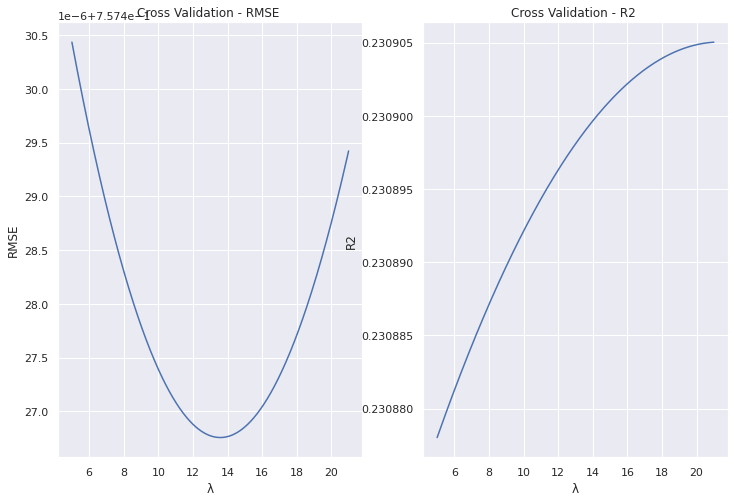

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(lambdas, scores_RMSE, label = 'RMSE')
ax[0].set_title("Cross Validation - RMSE ")
ax[0].set_xlabel('$\mathregular{\lambda}$')
ax[0].set_ylabel('RMSE')

ax[1].plot(lambdas, scores_R2, label = '$\mathregular{R^2}$')
ax[1].set_title("Cross Validation - R2 ")
ax[1].set_xlabel('$\mathregular{\lambda}$')
ax[1].set_ylabel('R2')
plt.show()

In [ ]:
print("Médias")
print("RMSE:", min(scores_RMSE),"    R2:", max(scores_R2))

Médias
RMSE: 0.7574267563246166     R2: 0.230905031243379


In [ ]:
print("Desvios padrão")
print("RMSE:", np.std(scores_RMSE),"    R2:", np.std(scores_R2))

Desvios padrão
RMSE: 9.866905285366832e-07     R2: 8.034686582414735e-06


## 1.4 PCR
- Resource: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
- nessa primeira parte eu tava testando o codigo do cara e acabei ja separando os dados. no dele ele separa so na frente, comisso acabei repetindo o processo de analise das pcs... em breve vou apagar o repetido

In [ ]:
df = pd.DataFrame.from_dict(w_wine_cleaned)
w_wine_train = df.copy(deep=False)
del w_wine_train['quality']
y = pd.concat([w_wine_cleaned['quality']], axis = 1)

x_treino, x_teste, y_treino, y_teste = skms.train_test_split(w_wine_train, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 


pca = PCA()
X_reduced = pca.fit_transform(scale(x_treino))

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]


,0,1,2,3,4,5
0,0.119776,-0.630107,-0.134012,-0.032155,0.211299,-0.108828
1,-0.018655,0.062868,0.487063,-0.545013,0.548516,0.312565
2,0.076389,-0.313946,-0.569987,-0.252472,-0.081237,0.620667
3,0.409256,-0.028939,0.276040,-0.015369,-0.094283,0.001856
4,0.340091,0.041092,-0.012442,0.319930,0.213854,0.251498


In [ ]:
y_treino = y_treino.values.ravel()


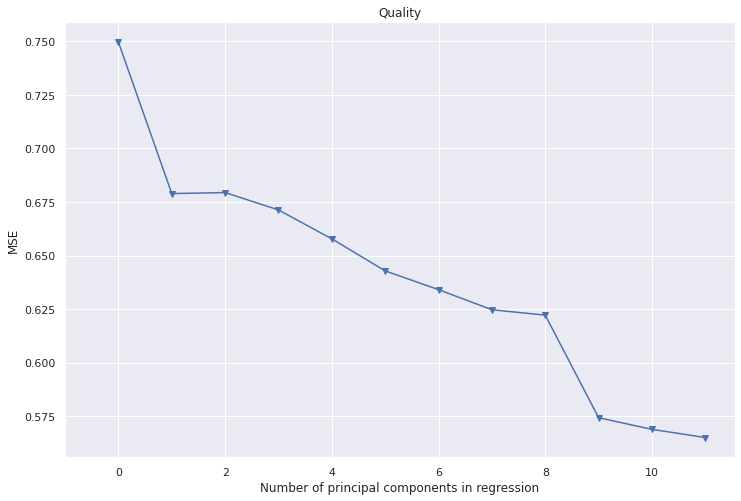

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression


# 10-fold CV, with shuffle
n = len(X_reduced)
X_reduced_train = pca.fit_transform(scale(x_treino))
kf_10 = model_selection.KFold( n_splits=10, random_state = None)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, 
                                           np.ones((n,1)), 
                                           y_treino.ravel(), 
                                           cv=kf_10, 
                                           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
                                               X_reduced[:,:i],
                                               y_treino.ravel(), 
                                               cv=kf_10, 
                                               scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 32.18,  45.5 ,  56.43,  66.19,  75.13,  82.1 ,  88.61,  94.02,
        97.4 ,  99.89, 100.  ])

In [ ]:
from sklearn.metrics import mean_squared_error

X_reduced_test = pca.transform(scale(x_teste))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_treino)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_teste, pred)

0.5675419413770215

In [ ]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(w_wine_train, y, test_size=0.25, random_state=1)


In [ ]:
y_train = y_train.values.ravel()

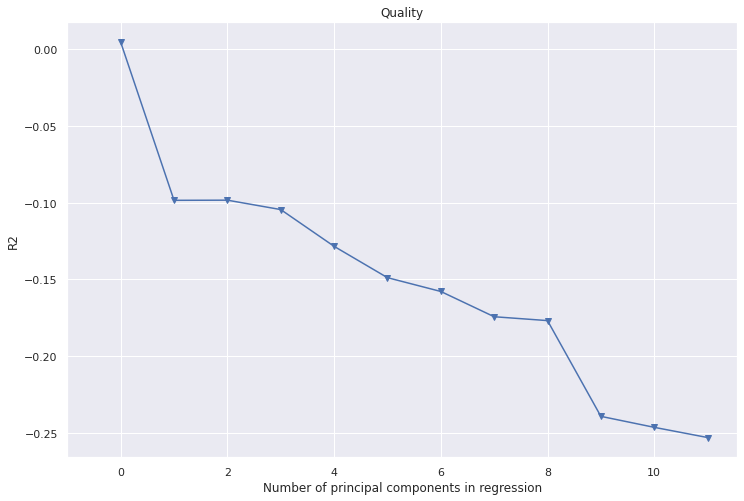

In [ ]:

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, random_state=None)

r2 = []

# Calculate r2 with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='r2').mean()    
r2.append(score)

# Calculate r2 using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='r2').mean()
    r2.append(score)

plt.plot(np.array(r2), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('R2')
plt.title('Quality')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 32.18,  45.5 ,  56.43,  66.19,  75.13,  82.1 ,  88.61,  94.02,
        97.4 ,  99.89, 100.  ])

In [ ]:
from sklearn.metrics import r2_score

X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
r2_score(y_test, pred)

0.13860222763667518

## 1.5 RNA

In [ ]:
import tensorflow as tf

### Vamos usar os valores de x e y obtidos com a pca

In [ ]:
from sklearn.model_selection import train_test_split

X_train = X_reduced_train[:, :7]
X_test = X_reduced_test

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Construindo a RNA

In [ ]:
def criar_ann():
  ann = tf.keras.Sequential()
  ann.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim = 7))
  ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
  ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
  return ann

### Treinando a RNA

In [ ]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
regressor = KerasRegressor(build_fn = criar_ann, epochs = 400, batch_size = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [ ]:
resultados = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10, scoring = "neg_mean_squared_error")
media = resultados.mean()
desvio = resultados.std()

Epoch 1/400
19/19 [==============================] - 3s 3ms/step - loss: 46.0074 - mse: 46.0074
Epoch 2/400
19/19 [==============================] - 0s 2ms/step - loss: 41.6277 - mse: 41.6277
Epoch 3/400
19/19 [==============================] - 0s 3ms/step - loss: 37.7665 - mse: 37.7665
Epoch 4/400
19/19 [==============================] - 0s 3ms/step - loss: 34.2196 - mse: 34.2196
Epoch 5/400
19/19 [==============================] - 0s 3ms/step - loss: 30.7711 - mse: 30.7711
Epoch 6/400
19/19 [==============================] - 0s 2ms/step - loss: 27.3726 - mse: 27.3726
Epoch 7/400
19/19 [==============================] - 0s 3ms/step - loss: 23.9295 - mse: 23.9295
Epoch 8/400
19/19 [==============================] - 0s 2ms/step - loss: 20.4874 - mse: 20.4874
Epoch 9/400
19/19 [==============================] - 0s 3ms/step - loss: 17.2223 - mse: 17.2223
Epoch 10/400
19/19 [==============================] - 0s 3ms/step - loss: 14.2334 - mse: 14.2334
Epoch 11/400
19/19 [===================

2/2 [==============================] - 0s 9ms/step
Epoch 1/400
19/19 [==============================] - 1s 4ms/step - loss: 32.5255 - mse: 32.5255
Epoch 2/400
19/19 [==============================] - 0s 3ms/step - loss: 29.6494 - mse: 29.6494
Epoch 3/400
19/19 [==============================] - 0s 4ms/step - loss: 26.6796 - mse: 26.6796
Epoch 4/400
19/19 [==============================] - 0s 3ms/step - loss: 23.4480 - mse: 23.4480
Epoch 5/400
19/19 [==============================] - 0s 3ms/step - loss: 19.9810 - mse: 19.9810
Epoch 6/400
19/19 [==============================] - 0s 3ms/step - loss: 16.4437 - mse: 16.4437
Epoch 7/400
19/19 [==============================] - 0s 4ms/step - loss: 13.1041 - mse: 13.1041
Epoch 8/400
19/19 [==============================] - 0s 3ms/step - loss: 10.1521 - mse: 10.1521
Epoch 9/400
19/19 [==============================] - 0s 3ms/step - loss: 7.7477 - mse: 7.7477
Epoch 10/400
19/19 [==============================] - 0s 4ms/step - loss: 5.9117 - mse:

2/2 [==============================] - 0s 7ms/step
Epoch 1/400
19/19 [==============================] - 0s 3ms/step - loss: 31.3873 - mse: 31.3873
Epoch 2/400
19/19 [==============================] - 0s 3ms/step - loss: 28.7048 - mse: 28.7048
Epoch 3/400
19/19 [==============================] - 0s 3ms/step - loss: 25.6867 - mse: 25.6867
Epoch 4/400
19/19 [==============================] - 0s 3ms/step - loss: 22.3360 - mse: 22.3360
Epoch 5/400
19/19 [==============================] - 0s 3ms/step - loss: 18.7904 - mse: 18.7904
Epoch 6/400
19/19 [==============================] - 0s 3ms/step - loss: 15.3234 - mse: 15.3234
Epoch 7/400
19/19 [==============================] - 0s 3ms/step - loss: 12.2619 - mse: 12.2619
Epoch 8/400
19/19 [==============================] - 0s 3ms/step - loss: 9.7814 - mse: 9.7814
Epoch 9/400
19/19 [==============================] - 0s 3ms/step - loss: 7.9103 - mse: 7.9103
Epoch 10/400
19/19 [==============================] - 0s 3ms/step - loss: 6.4624 - mse: 6

In [ ]:
print(media)
print('-------------------')
print(desvio)

-0.6255912848823255
-------------------
0.11128960504095815


In [ ]:
resultados = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10, scoring = "r2")
media = resultados.mean()
desvio = resultados.std()

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 305/400
19/19 [==============================] - 0s 3ms/step - loss: 0.5243 - mse: 0.5243
Epoch 306/400
19/19 [==============================] - 0s 3ms/step - loss: 0.5207 - mse: 0.5207
Epoch 307/400
19/19 [==============================] - 0s 3ms/step - loss: 0.5221 - mse: 0.5221
Epoch 308/400
19/19 [==============================] - 0s 4ms/step - loss: 0.5233 - mse: 0.5233
Epoch 309/400
19/19 [==============================] - 0s 4ms/step - loss: 0.5231 - mse: 0.5231
Epoch 310/400
19/19 [==============================] - 0s 4ms/step - loss: 0.5217 - mse: 0.5217
Epoch 311/400
19/19 [==============================] - 0s 4ms/step - loss: 0.5246 - mse: 0.5246
Epoch 312/400
19/19 [==============================] - 0s 3ms/step - loss: 0.5254 - mse: 0.5254
Epoch 313/400
19/19 [==============================] - 0s 4ms/step - loss: 0.5216 - mse: 0.5216
Epoch 314/400
19/19 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
print(media)
print('-------------------')
print(desvio)

0.1683143490735078
-------------------
0.09990397456421064


#2. Vinho Tinto

## 2.1 Preprocessamento

### 2.1.1 Criação do cleaned (não removemos os outliers)

In [ ]:
r_wine_cleaned = w_wine.copy()
# r_wine_cleaned = apply_remotion(r_wine)

### 2.1.2 Tratamento de Multicolinearidade com ajuda do PCA

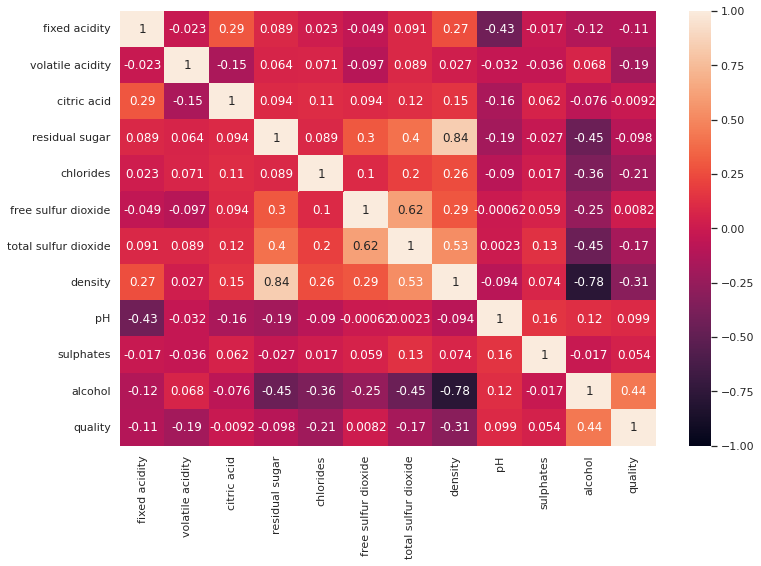

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(r_wine_cleaned.corr(), annot=True, vmin=-1, vmax=1)
plt.savefig('r_wine_heatmap.png')

In [ ]:
X = r_wine_cleaned.iloc[:, 0:11]
y = r_wine_cleaned.iloc[:, -1]
column_name = r_wine_cleaned.drop(columns=['quality']).columns

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(pcs,loadings, target, column_name, labels=None):
    xs = pcs[:,0]
    ys = pcs[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    pc1 = xs*scalex
    pc2 = ys*scaley

    df = {'pc1': pc1, 'pc2': pc2, 'quality': target}
    df = pd.DataFrame(data=df)

    fig = px.scatter(df, x='pc1', y='pc2', color='quality', color_continuous_scale = "rainbow")

    for i, feature in enumerate(column_name):
        fig.add_shape(type='line',
                      x0=0,
                      y0=0,
                      x1=loadings[i,0],
                      y1=loadings[i,1]
                    )
        fig.add_annotation(x=loadings[i,0],
                           y=loadings[i,1],
                           ax=0,
                           ay=0,
                           xanchor="center",
                           yanchor="bottom",
                           text = feature,
                           font=dict(size=18,
                                     color="crimson"
                                    )
                          )
    fig.show()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), y, column_name)

In [ ]:
r_wine_dropped = r_wine_cleaned.drop(columns=["free sulfur dioxide", "pH", "density", "citric acid"])

##2.2 Regressao Linear

**Importando bibliotecas**

In [ ]:
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn as sk

**Definindo o x e y**

In [ ]:
df = pd.DataFrame.from_dict(r_wine_dropped)
r_wine_train = df.copy(deep=False)
del r_wine_train['quality']
y = pd.concat([r_wine_dropped['quality']], axis = 1)

**Fazendo a regressão linear**

In [ ]:
x_treino, x_teste, y_treino, y_teste = skms.train_test_split(r_wine_train, y, test_size=0.25, random_state=0)
lm = sklm.LinearRegression()
lm.fit(x_treino, y_treino)
f = lm.predict(r_wine_train)
y_pred = lm.predict(x_teste)

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[[-6.98514526e-02 -2.05518116e+00  2.64118977e-02 -1.40698642e+00
   5.31297687e-04  3.74910607e-01  3.67396790e-01]]
[2.72163024]


### 2.2.1 5-fold Cross validation - RMSE

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5, random_state = None)
media = cross_val_score(lm, r_wine_train, y, cv=kf, scoring = 'neg_mean_absolute_error')
print(-media)

[0.65868824 0.60746429 0.60094339 0.57558258 0.55236346]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

-0.5990083925026022
-------------
0.03566917029284976


### 2.2.2 10-fold Cross validation - RMSE

In [ ]:
kf = KFold(n_splits = 10, random_state = None)
media = cross_val_score(lm, r_wine_train, y, cv=kf, scoring = 'neg_mean_absolute_error')
print(-media)

[0.62984227 0.67818843 0.65281575 0.55758345 0.61743694 0.58109625
 0.59703115 0.55307282 0.5661704  0.51711465]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

-0.5950352103770904
-------------
0.047151845486228666


**$R^2$ 5-Fold validation**

In [ ]:
kf = KFold(n_splits = 5, random_state = None)
media = cross_val_score(lm, r_wine_train, y, cv=kf, scoring = 'r2')
print(media)

[0.18229209 0.28332001 0.26526991 0.30221145 0.15786143]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

0.2381909796393463
-------------
0.057351619532110924


**$R^2$ 10-Fold validation**

In [ ]:
kf = KFold(n_splits = 10, random_state = None)
media = cross_val_score(lm, r_wine_train, y, cv=kf, scoring = 'r2')
print(media)

[0.19406502 0.18595262 0.25212798 0.32641894 0.14598332 0.34271936
 0.25685359 0.34778501 0.17990569 0.18753443]


In [ ]:
print(media.mean())
print("-------------")
print(media.std())

0.24193459609303095
-------------
0.07089785015799782


## 2.3 Regressão $L_2$-penalisada/Ridge

In [ ]:
# dividindo os dados entre conjunto de teste e treino
# definindo o cojunto de dados X para a regressão
df = pd.DataFrame.from_dict(r_wine_dropped)
r_wine_train = df.copy(deep=False)
del r_wine_train['quality']
y = pd.concat([r_wine_dropped['quality']], axis = 1) # definindo a variável independente

x_treino, x_teste, y_treino, y_teste = skms.train_test_split(r_wine_train, y, test_size=0.25, random_state=0)

# centralizando e scaling dos dados
x_treino = StandardScaler().fit_transform(x_treino)
x_teste = StandardScaler().fit_transform(x_teste)

# definindo espaço de busca para os lambdas
lambdas = np.linspace(5, 100, 1000)

In [ ]:
scores_RMSE = []
scores_R2 = []

for lamb in lambdas:
    # aplicando a regressão
    ridge = sklm.Ridge(alpha = lamb)
    ridge.fit(x_treino, y_treino)             # Fit a ridge regression on the training data
    
    scores = skms.cross_validate(ridge, x_treino, y_treino, cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
    
    scores_RMSE.append(np.mean(scores['test_neg_root_mean_squared_error']*(-1)))
    scores_R2.append(np.mean(scores['test_r2']))

In [ ]:
ridge_best_r = sklm.Ridge(alpha = 0.001)
ridge_best_r.fit(x_treino, y_treino)             # Fit a ridge regression on the training data
pred_r = ridge_best_r.predict(x_teste)           # Use this model to predict the test data
print("RMSE :\n", mean_squared_error(y_teste, pred_r, squared=False))          # Calculate the test MSE
print("R2 :\n", r2_score(y_teste, pred_r))          # Calculate the test R2

RMSE :
 0.7937974029932539
R2 :
 0.24713141689846263


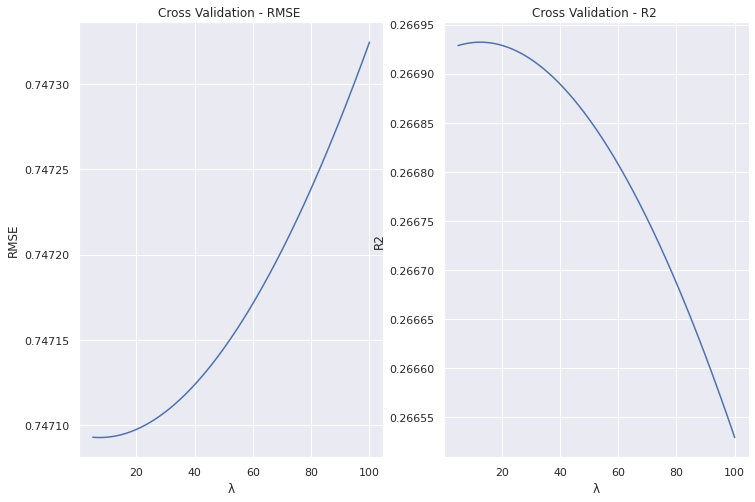

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(lambdas, scores_RMSE, label = 'RMSE')
ax[0].set_title("Cross Validation - RMSE ")
ax[0].set_xlabel('$\mathregular{\lambda}$')
ax[0].set_ylabel('RMSE')

ax[1].plot(lambdas, scores_R2, label = '$\mathregular{R^2}$')
ax[1].set_title("Cross Validation - R2 ")
ax[1].set_xlabel('$\mathregular{\lambda}$')
ax[1].set_ylabel('R2')
plt.show()

In [ ]:
print("Média")
print("RMSE:", min(scores_RMSE),"    R2:", max(scores_R2))

Média
RMSE: 0.7470926804365361     R2: 0.2669320091031523


In [ ]:
print("Desvio Padrão")
print("RMSE:", np.std(scores_RMSE),"    R2:", np.std(scores_R2))

Desvio Padrão
RMSE: 6.996292009250435e-05     R2: 0.00012179213237038308


## 2.4 PCR
- Resource: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
- nessa primeira parte eu tava testando o codigo do cara e acabei ja separando os dados. no dele ele separa so na frente, comisso acabei repetindo o processo de analise das pcs... em breve vou apagar o repetido

###2.4.1 RMSE

In [ ]:
df = pd.DataFrame.from_dict(r_wine_cleaned)
r_wine_train = df.copy(deep=False)
del r_wine_train['quality']
y = pd.concat([r_wine_cleaned['quality']], axis = 1)

x_treino, x_teste, y_treino, y_teste = skms.train_test_split(r_wine_train, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 


pca = PCA()
X_reduced = pca.fit_transform(scale(x_treino))

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]


,0,1,2,3,4,5
0,0.161453,-0.585774,0.148996,0.064352,0.238069,-0.141982
1,-0.002323,0.044311,-0.575638,0.400877,0.601147,0.043329
2,0.137563,-0.327590,0.503845,0.220374,-0.019050,0.171744
3,0.426881,0.000892,-0.183479,-0.283327,0.053264,-0.253734
4,0.207041,-0.000994,-0.159822,0.643643,-0.440836,0.373204


In [ ]:
y_treino = y_treino.values.ravel()


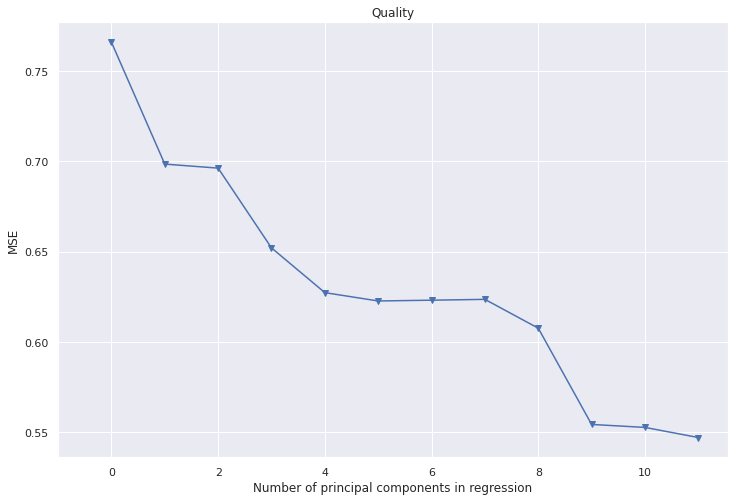

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression


# 10-fold CV, with shuffle
n = len(X_reduced)
X_reduced_train = pca.fit_transform(scale(x_treino))
kf_10 = model_selection.KFold( n_splits=10,  random_state=None)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, 
                                           np.ones((n,1)), 
                                           y_treino.ravel(), 
                                           cv=kf_10, 
                                           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
                                               X_reduced[:,:i],
                                               y_treino.ravel(), 
                                               cv=kf_10, 
                                               scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 29.7 ,  43.82,  54.93,  64.45,  73.11,  81.43,  88.11,  93.55,
        97.25,  99.87, 100.  ])

In [ ]:
from sklearn.metrics import mean_squared_error

X_reduced_test = pca.transform(scale(x_teste))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_treino)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_teste, pred)

0.7202955659205422

### 2.4.2 $R^2$

In [ ]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(r_wine_train, y, test_size=0.25, random_state=0)


In [ ]:
y_train = y_train.values.ravel()

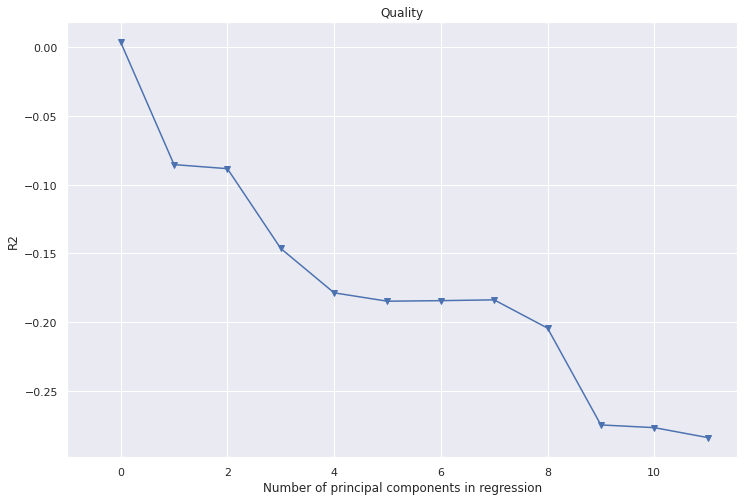

In [ ]:

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, random_state=None)

r2 = []

# Calculate r2 with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='r2').mean()    
r2.append(score)

# Calculate r2 using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='r2').mean()
    r2.append(score)

plt.plot(np.array(r2), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('R2')
plt.title('Quality')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 29.7 ,  43.82,  54.93,  64.45,  73.11,  81.43,  88.11,  93.55,
        97.25,  99.87, 100.  ])

In [ ]:
from sklearn.metrics import r2_score

X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
r2_score(y_test, pred)

0.13938171614354555

## 2.5 RNA

In [ ]:
import tensorflow as tf

### Vamos usar os valores de x e y obtidos com a pca

In [ ]:
from sklearn.model_selection import train_test_split

X_train = X_reduced_train[:, :7]
X_test = X_reduced_test

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Construindo a RNA

In [ ]:
def criar_ann():
  ann = tf.keras.Sequential()
  ann.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim = 7))
  ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
  ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
  return ann

### Treinando a RNA

In [ ]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
regressor = KerasRegressor(build_fn = criar_ann, epochs = 300, batch_size = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [ ]:
resultados = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10, scoring = "neg_mean_squared_error")
media = resultados.mean()
desvio = resultados.std()

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 206/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5953 - mse: 0.5953
Epoch 207/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5933 - mse: 0.5933
Epoch 208/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5976 - mse: 0.5976
Epoch 209/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5926 - mse: 0.5926
Epoch 210/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5921 - mse: 0.5921
Epoch 211/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5915 - mse: 0.5915
Epoch 212/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5924 - mse: 0.5924
Epoch 213/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5924 - mse: 0.5924
Epoch 214/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5996 - mse: 0.5996
Epoch 215/300
23/23 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
print(media)
print('-------------------')
print(desvio)

-0.6224273874657246
-------------------
0.08926063831015606


In [ ]:
resultados = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10, scoring = "r2")
media = resultados.mean()
desvio = resultados.std()

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 206/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6173 - mse: 0.6173
Epoch 207/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6191 - mse: 0.6191
Epoch 208/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6127 - mse: 0.6127
Epoch 209/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6171 - mse: 0.6171
Epoch 210/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6184 - mse: 0.6184
Epoch 211/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6327 - mse: 0.6327
Epoch 212/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6171 - mse: 0.6171
Epoch 213/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6135 - mse: 0.6135
Epoch 214/300
23/23 [==============================] - 0s 4ms/step - loss: 0.6121 - mse: 0.6121
Epoch 215/300
23/23 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
print(media)
print('-------------------')
print(desvio)

0.23076006958330114
-------------------
0.12446287337886254
